# CA03 – Decision Tree Algorithm

1. Data Source and Contents

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#Data Source:
df=pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')
df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


In [17]:
df.hours_per_week_bin.value_counts()

b. 31-40            26639
d. 41-50 & 61-70     9819
a. 0-30              7851
e. 51-60             3759
c. 71-100             774
Name: hours_per_week_bin, dtype: int64

In [18]:
df.occupation_bin.value_counts()

c. Mid - Mid     13971
b. Mid - Low     12947
e. High          12258
a. Low            7237
d. Mid - High     2429
Name: occupation_bin, dtype: int64

In [19]:
df.msr_bin.value_counts()

c. High    22047
b. Mid     15868
a. Low     10927
Name: msr_bin, dtype: int64

In [20]:
df.capital_gl_bin.value_counts()

a. = 0    42525
c. > 0     4035
b. < 0     2282
Name: capital_gl_bin, dtype: int64

In [21]:
df.race_sex_bin.value_counts()

c. High    29737
b. Mid     16457
a. Low      2648
Name: race_sex_bin, dtype: int64

In [22]:
df.education_num_bin.value_counts()

b. 9-12    30324
c. 13       8025
a. 0-8      6408
d. 14       2657
e. 15+      1428
Name: education_num_bin, dtype: int64

In [23]:
df.education_bin.value_counts()

b. Mid          30324
c. Bachelors     8025
a. Low           6408
d. Masters       2657
e. High          1428
Name: education_bin, dtype: int64

In [24]:
df.workclass_bin.value_counts()

b. income       46012
a. no income     2830
Name: workclass_bin, dtype: int64

In [25]:
df.age_bin.value_counts()

e. 40-55             13963
a. 0-25               9627
c. 31-35 & 61-70      9291
d. 36-40 & 56-60      8927
b. 26-30 & 71-100     7034
Name: age_bin, dtype: int64

In [26]:
#Transfer continuous data to discrete categories data

In [27]:
df['hours_per_week_bin_1']=df['hours_per_week_bin'].apply(lambda x:x.split('.')[0])
df['occupation_bin_1']=df['occupation_bin'].apply(lambda x:x.split('.')[0])
df['msr_bin_1']=df['msr_bin'].apply(lambda x:x.split('.')[0])
df['capital_gl_bin_1']=df['capital_gl_bin'].apply(lambda x:x.split('.')[0])
df['race_sex_bin_1']=df['race_sex_bin'].apply(lambda x:x.split('.')[0])
df['education_num_bin_1']=df['education_num_bin'].apply(lambda x:x.split('.')[0])
df['education_bin_1']=df['education_bin'].apply(lambda x:x.split('.')[0])
df['workclass_bin_1']=df['workclass_bin'].apply(lambda x:x.split('.')[0])
df['age_bin_1']=df['age_bin'].apply(lambda x:x.split('.')[0])
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y,hours_per_week_bin_1,occupation_bin_1,msr_bin_1,capital_gl_bin_1,race_sex_bin_1,education_num_bin_1,education_bin_1,workclass_bin_1,age_bin_1
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0,b,b,b,c,c,c,c,b,d
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0,a,e,c,a,c,c,c,b,e
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0,b,a,b,a,c,b,b,b,d
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0,b,a,c,a,b,a,a,b,e
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0,b,e,c,a,a,c,c,b,b


In [28]:
df['hours_per_week_bin_1']=df['hours_per_week_bin_1'].astype('category')
df['hours_per_week_bin_c']=df['hours_per_week_bin_1'].cat.codes
df['occupation_bin_1']=df['occupation_bin_1'].astype('category')
df['occupation_bin_c']=df['occupation_bin_1'].cat.codes
df['msr_bin_1']=df['msr_bin_1'].astype('category')
df['msr_bin_c']=df['msr_bin_1'].cat.codes
df['capital_gl_bin_1']=df['capital_gl_bin_1'].astype('category')
df['capital_gl_bin_c']=df['capital_gl_bin_1'].cat.codes
df['race_sex_bin_1']=df['race_sex_bin_1'].astype('category')
df['race_sex_bin_c']=df['race_sex_bin_1'].cat.codes
df['workclass_bin_1']=df['workclass_bin_1'].astype('category')
df['workclass_bin_c']=df['workclass_bin_1'].cat.codes
df['education_num_bin_1']=df['education_num_bin_1'].astype('category')
df['education_num_bin_c']=df['education_num_bin_1'].cat.codes
df['education_bin_1']=df['education_bin_1'].astype('category')
df['education_bin_c']=df['education_bin_1'].cat.codes
df['age_bin_1']=df['age_bin_1'].astype('category')
df['age_bin_c']=df['age_bin_1'].cat.codes
df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,...,age_bin_1,hours_per_week_bin_c,occupation_bin_c,msr_bin_c,capital_gl_bin_c,race_sex_bin_c,workclass_bin_c,education_num_bin_c,education_bin_c,age_bin_c
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,...,d,1,1,1,2,2,1,2,2,3
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,...,e,0,4,2,0,2,1,2,2,4
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,...,d,1,0,1,0,2,1,1,1,3
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,...,e,1,0,2,0,1,1,0,0,4
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,...,b,1,4,2,0,0,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,...,d,1,4,1,0,1,1,2,2,3
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,...,c,1,1,0,0,1,0,1,1,2
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,...,d,3,4,2,0,2,1,2,2,3
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,...,e,1,1,0,2,2,1,2,2,4


In [29]:
train_data=df[df['flag']=='train']
test_data=df[df['flag']=='test']

In [30]:
X_train,y_train=train_data[['hours_per_week_bin_c','occupation_bin_c','msr_bin_c','capital_gl_bin_c','race_sex_bin_c','education_num_bin_c','education_bin_c','workclass_bin_c','age_bin_c']],train_data['y']
X_test,y_test=test_data[['hours_per_week_bin_c','occupation_bin_c','msr_bin_c','capital_gl_bin_c','race_sex_bin_c','education_num_bin_c','education_bin_c','workclass_bin_c','age_bin_c']],test_data['y']

# 2. Data Quality Analysis (DQA)

In [31]:
train=df[['hours_per_week_bin_c','occupation_bin_c','msr_bin_c','capital_gl_bin_c','race_sex_bin_c','education_num_bin_c','education_bin_c','workclass_bin_c','age_bin_c']]

In [32]:
train

,hours_per_week_bin_c,occupation_bin_c,msr_bin_c,capital_gl_bin_c,race_sex_bin_c,education_num_bin_c,education_bin_c,workclass_bin_c,age_bin_c
0,1,1,1,2,2,2,2,1,3
1,0,4,2,0,2,2,2,1,4
2,1,0,1,0,2,1,1,1,3
3,1,0,2,0,1,0,0,1,4
4,1,4,2,0,0,2,2,1,1
...,...,...,...,...,...,...,...,...,...
48837,1,4,1,0,1,2,2,1,3
48838,1,1,0,0,1,1,1,0,2
48839,3,4,2,0,2,2,2,1,3
48840,1,1,0,2,2,2,2,1,4


In [33]:
train.isnull().sum()

hours_per_week_bin_c    0
occupation_bin_c        0
msr_bin_c               0
capital_gl_bin_c        0
race_sex_bin_c          0
education_num_bin_c     0
education_bin_c         0
workclass_bin_c         0
age_bin_c               0
dtype: int64

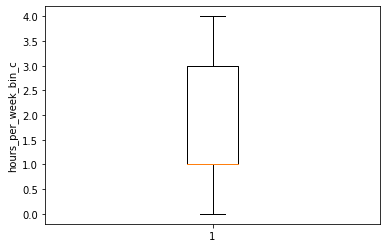

In [34]:
plt.boxplot(df['hours_per_week_bin_c'])
plt.ylabel('hours_per_week_bin_c')
plt.show()

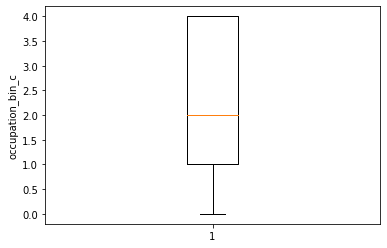

In [35]:
plt.boxplot(df['occupation_bin_c'])
plt.ylabel('occupation_bin_c')
plt.show()

# #missing values and outliers looks good

In [36]:
import seaborn as sns

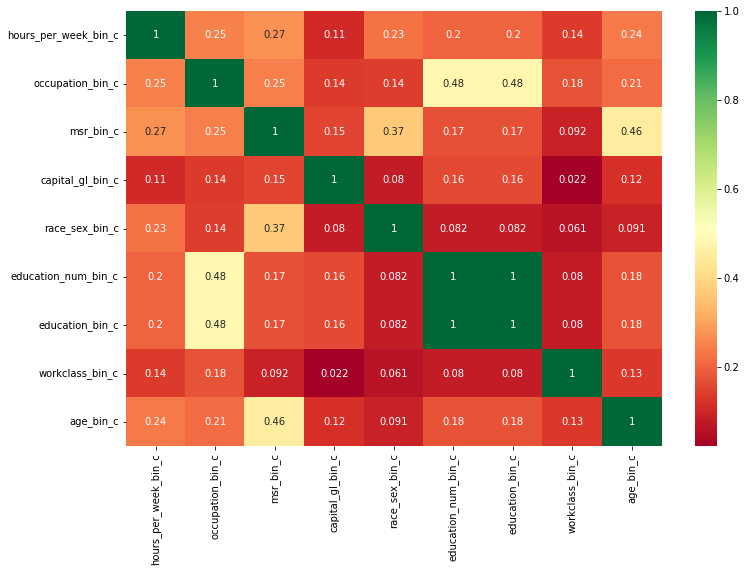

In [37]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), cmap='RdYlGn', annot=True)
plt.show()

In [38]:
df[['hours_per_week_bin','occupation_bin','msr_bin','capital_gl_bin','race_sex_bin','education_num_bin','education_bin','workclass_bin','age_bin']].describe()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,5,5,3,3,3,5,5,2,5
top,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963


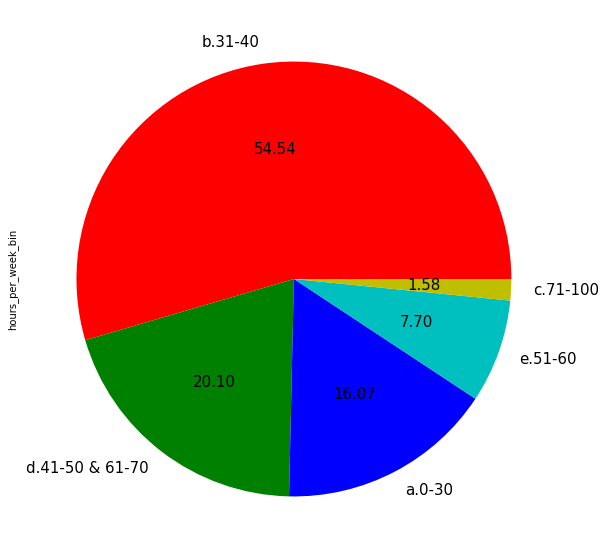

In [39]:
hpwb=df['hours_per_week_bin'].value_counts()
hpwb.plot.pie(labels=['b.31-40', 'd.41-50 & 61-70', 'a.0-30', 'e.51-60', 'c.71-100'],
              colors=['r', 'g', 'b', 'c', 'y'],autopct='%.2f', fontsize=15, figsize=(10, 10))

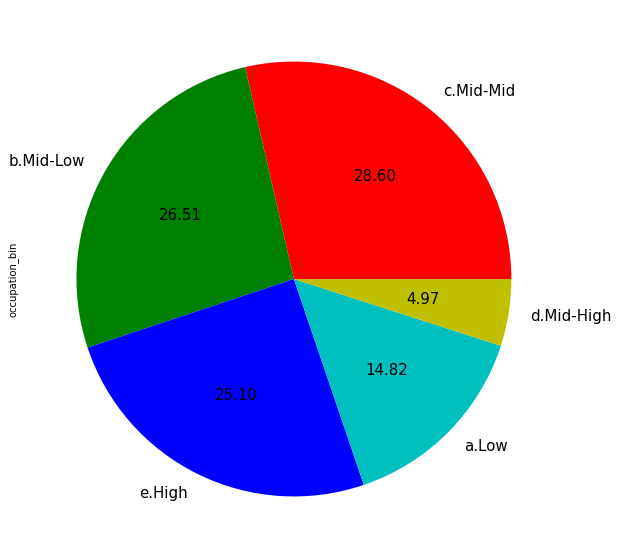

In [40]:
ob=df['occupation_bin'].value_counts()
ob.plot.pie(labels=['c.Mid-Mid', 'b.Mid-Low', 'e.High', 'a.Low', 'd.Mid-High'],
              colors=['r', 'g', 'b', 'c', 'y'],autopct='%.2f', fontsize=15, figsize=(10, 10))

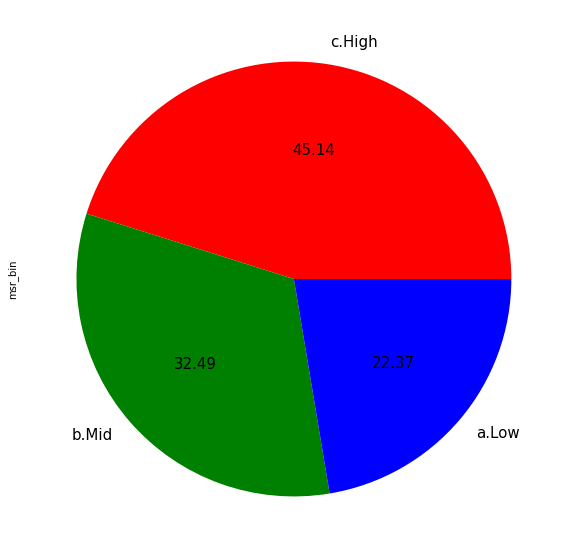

In [41]:
mb=df['msr_bin'].value_counts()
mb.plot.pie(labels=['c.High', 'b.Mid', 'a.Low'],
              colors=['r', 'g', 'b'],autopct='%.2f', fontsize=15, figsize=(10, 10))

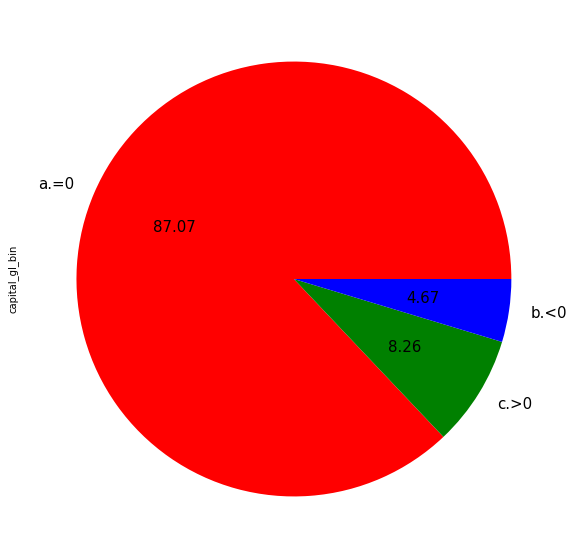

In [42]:
cgb=df['capital_gl_bin'].value_counts()
cgb.plot.pie(labels=['a.=0', 'c.>0', 'b.<0'],
              colors=['r', 'g', 'b'],autopct='%.2f', fontsize=15, figsize=(10, 10))

# 3. Build Decision Tree Classifier Models

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=10,random_state=101,max_features=None,min_samples_leaf=15)
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)

In [44]:
y_pre=y_pred.tolist()
y_tes=y_test.tolist()

# 4. Evaluate Decision Tree Performance

In [45]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_tes, y_pre, labels=range(2))
cm

array([[11607,   828],
       [ 1715,  2131]])

In [46]:
import numpy as np
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
TN = cm[0][0]
print(TP, FP, TN, FN)

2131 828 11607 1715


In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print("Accuracy Score,",accuracy_score(y_tes,y_pre))
print("Precision Score,",precision_score(y_tes,y_pre))
print("Recall Score,",recall_score(y_tes,y_pre))
print("F1 Score,",f1_score(y_tes,y_pre))

Accuracy Score, 0.8438056630428107
Precision Score, 0.7201757350456235
Recall Score, 0.5540821632865315
F1 Score, 0.6263041880969876


# 5. Tune Decision Tree Performance

## Run1

In [48]:
split_opt=['entropy','gini']
print(['Split','Accuracy','Precision','Recall','F1'])
for split in split_opt:
    model=DecisionTreeClassifier(criterion=split,random_state=101)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print([split,accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred)])

['Split', 'Accuracy', 'Precision', 'Recall', 'F1']
['entropy', 0.8368650574289048, 0.6930564568462038, 0.5553822152886115, 0.6166281755196305]
['gini', 0.8367422148516676, 0.6929824561403509, 0.5546021840873635, 0.6161178509532063]


## Run2

In [49]:
split_opt=list(range(5,45,5))
print(['minimum_leaf','Accuracy','Precision','Recall','F1'])
for split in split_opt:
    model=DecisionTreeClassifier(min_samples_leaf=split,random_state=101)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print([split,accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred)])

['minimum_leaf', 'Accuracy', 'Precision', 'Recall', 'F1']
[5, 0.8398132792825993, 0.7012353706111834, 0.5608424336973479, 0.6232302802658191]
[10, 0.8404889134574043, 0.7042852469741576, 0.5598023920956838, 0.6237867593799797]
[15, 0.8420244456728703, 0.7081699346405229, 0.5634425377015081, 0.6275702287865624]
[20, 0.8425158159818193, 0.704140127388535, 0.5748829953198128, 0.632980246206699]
[25, 0.8427615011362939, 0.7071520618556701, 0.5707228289131565, 0.6316546762589929]
[30, 0.8430686075793871, 0.7118477190679356, 0.5639625585023401, 0.6293341070651386]
[35, 0.8430071862907684, 0.7138594164456233, 0.5598023920956838, 0.6275138443602448]
[40, 0.8430686075793871, 0.7163928930606772, 0.5556422256890275, 0.6258603016547079]


Run3

In [50]:
split_opt=[None,'auto',0.3,0.4,0.5,0.6,0.7,0.8]
print(['minimum_leaf','Accuracy','Precision','Recall','F1'])
for split in split_opt:
    model=DecisionTreeClassifier(max_features=split,random_state=101)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print([split,accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred)])

['minimum_leaf', 'Accuracy', 'Precision', 'Recall', 'F1']
[None, 0.8367422148516676, 0.6929824561403509, 0.5546021840873635, 0.6161178509532063]
['auto', 0.8366193722744303, 0.691661279896574, 0.5564222568902756, 0.6167146974063401]
[0.3, 0.835145261347583, 0.6891276041666666, 0.5504420176807072, 0.6120265972824516]
[0.4, 0.8366193722744303, 0.691661279896574, 0.5564222568902756, 0.6167146974063401]
[0.5, 0.8360051593882439, 0.6901681759379042, 0.5548621944877795, 0.615162871144422]
[0.6, 0.8371107425833794, 0.693579766536965, 0.5561622464898596, 0.6173160173160174]
[0.7, 0.8373564277378539, 0.6949869791666666, 0.5551222048881955, 0.6172304134142815]
[0.8, 0.8362508445427185, 0.6911860012961762, 0.5546021840873635, 0.6154068090017311]


Run4

In [51]:
split_opt=list(range(2,18,2))
print(['minimum_leaf','Accuracy','Precision','Recall','F1'])
for split in split_opt:
    model=DecisionTreeClassifier(max_depth=split,random_state=101)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print([split,accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred)])

['minimum_leaf', 'Accuracy', 'Precision', 'Recall', 'F1']
[2, 0.8217554204287206, 0.7159194876486734, 0.40691627665106606, 0.5188992042440318]
[4, 0.8349609974817271, 0.708979444644789, 0.5111804472178887, 0.59404743919021]
[6, 0.843252871445243, 0.7069737683941139, 0.5746229849193968, 0.633964429145152]
[8, 0.8466924636078865, 0.7138783269961977, 0.5858034321372855, 0.6435304198800342]
[10, 0.8431300288680057, 0.71334214002642, 0.5616224648985959, 0.6284550480069827]
[12, 0.839199066396413, 0.7039867109634551, 0.5509620384815392, 0.618144690781797]
[14, 0.8369879000061421, 0.6955380577427821, 0.5512220488819553, 0.615027560197273]
[16, 0.8372335851606166, 0.694408322496749, 0.5553822152886115, 0.6171626697486275]


Q.3 Decision Tree Hyper-parameter variation vs. performance

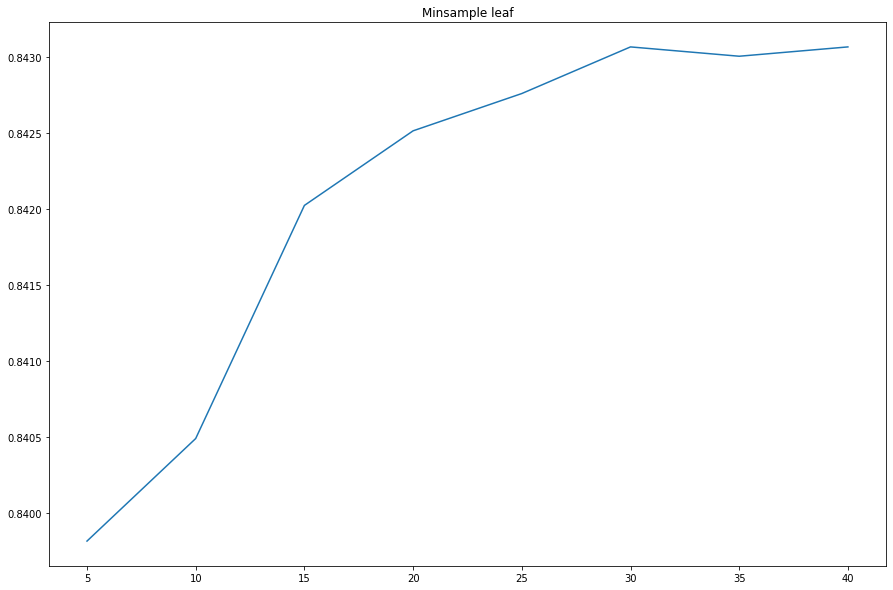

In [52]:
import matplotlib.pyplot as plt
x_axis=[5,10,15,20,25,30,35,40]
y_axis=[0.8398132792825993,0.8404889134574043,0.8420244456728703,0.8425158159818193,0.8427615011362939,0.8430686075793871,0.8430071862907684,0.8430686075793871]
plt.figure(figsize=(15,10))
plt.title('Minsample leaf')
plt.plot(x_axis,y_axis)

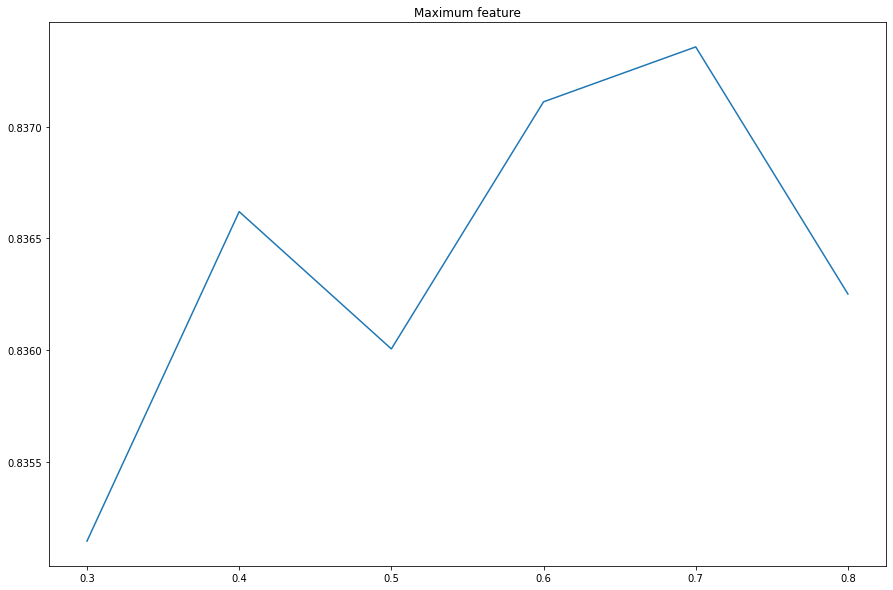

In [53]:
import matplotlib.pyplot as plt
x_axis=[0.3,0.4,0.5,0.6,0.7,0.8]
y_axis=[0.835145261347583,0.8366193722744303,0.8360051593882439,0.8371107425833794,0.8373564277378539,0.8362508445427185]
plt.figure(figsize=(15,10))
plt.title('Maximum feature')
plt.plot(x_axis,y_axis)

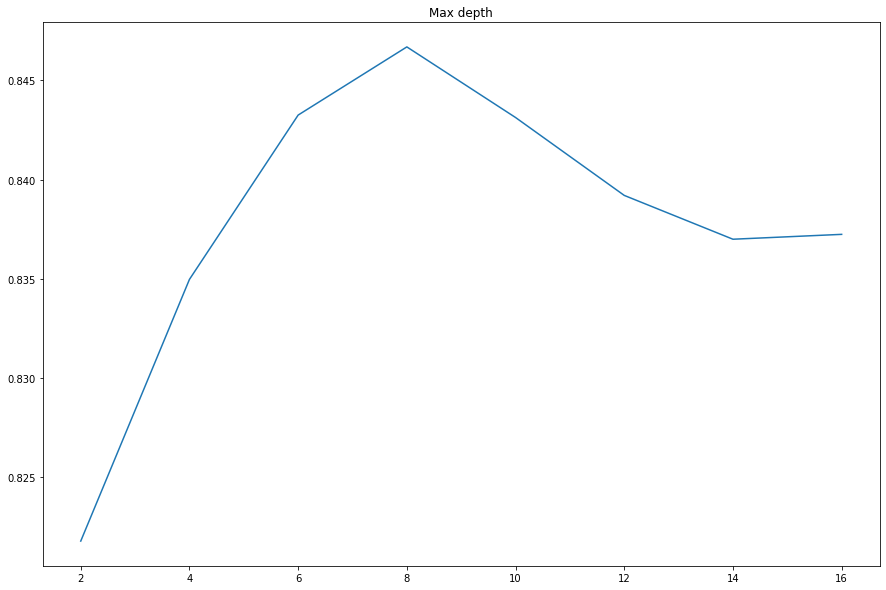

In [54]:
x_axis=list(range(2,18,2))
y_axis=[0.8217554204287206,0.8349609974817271,0.843252871445243,0.8466924636078865,
        0.8431300288680057,0.839199066396413,0.8369879000061421,0.8372335851606166]
plt.figure(figsize=(15,10))
plt.title('Max depth')
plt.plot(x_axis,y_axis)

# 6. Visualize Your Best Decision Tree using GraphViz

In [55]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import graphviz
from sklearn.tree import export_graphviz
import time
import sklearn.datasets as datasets
from six import StringIO 
from IPython.display import Image 
import pydotplus
tim1=time.time()
dtree=DecisionTreeClassifier(max_depth=8,max_features=0.7,criterion='entropy',min_samples_leaf=30)
dtree.fit(X_train,y_train)
time2=time.time()
print(time2-tim1)

0.04584670066833496


In [59]:
tree_dot = StringIO()
export_graphviz(dtree, out_file=tree_dot, class_names=["<=50k", ">50k"],feature_names=['hours_per_week_bin','occupation_bin','msr_bin','capital_gl_bin','race_sex_bin','education_num_bin','education_bin','workclass_bin','age_bin'], impurity=False, filled=True)

In [60]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

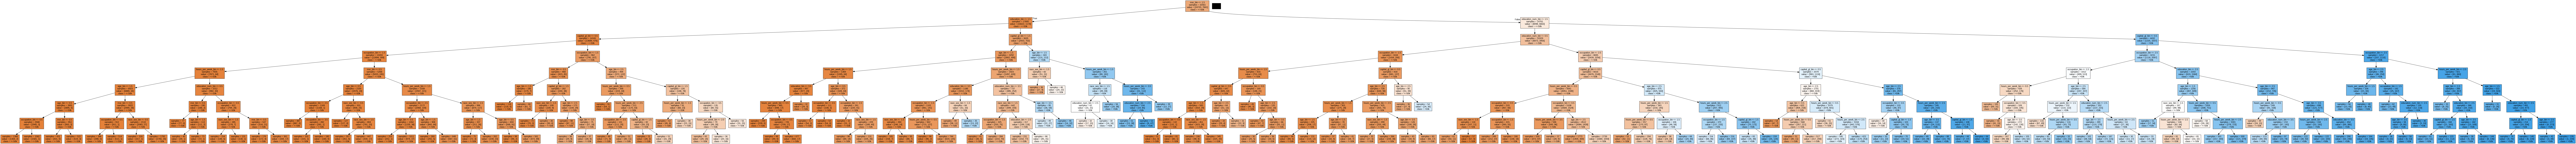

In [61]:
graph = pydotplus.graph_from_dot_data(tree_dot.getvalue())  
Image(graph.create_png())

In [62]:
y_pred=dtree.predict(X_test)
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print("Accuracy Score,",accuracy_score(y_test,y_pred))
print("Precision Score,",precision_score(y_test,y_pred))
print("Recall Score,",recall_score(y_test,y_pred))
print("F1 Score,",f1_score(y_test,y_pred))

Accuracy Score, 0.8461396720103188
Precision Score, 0.7181906931337455
Recall Score, 0.5738429537181488
F1 Score, 0.6379534614828732


In [63]:
y_pred1=dtree.predict(X_train)
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print("Accuracy Score,",accuracy_score(y_train,y_pred1))
print("Precision Score,",precision_score(y_train,y_pred1))
print("Recall Score,",recall_score(y_train,y_pred1))
print("F1 Score,",f1_score(y_train,y_pred1))

Accuracy Score, 0.8462577930653236
Precision Score, 0.7282976324689966
Recall Score, 0.5767121540619818
F1 Score, 0.6437010676156584


# 7. Conclusion

**Q.4 How long was your total run time to train the best model?**
From box 22, we only spend 0.019s for the total run time to train the best model.

**Q.5 Did you find the BEST TREE?**
The 'best' tree is a tree with max_depth=8,max_features=0.7,criterion='entropy',min_samples_leaf=30. Actually no. We trained only a single variable separately, which occurred with all other variables at default values, and not for the combined form of the four parameters. If we want to obtain the best model, we need to further tune the parameter crossover.

**Q.6 Write your observations from the visualization of the best tree**
This is a tree with a depth of 8. There are over 30 data at each leaf node.

**Q.7 Will this Tree “overfit”?**
From the result on the test set and train set, we find that the effect on the test set and train set are similar, so we are not facing the problem of overfitting problem. It is more like the underfitting problem as the recall is only around 0.56, which means nearly half of the positive cases are not classified correctly.

# 8. Prediction using your “trained” Decision Tree Model

In [64]:
dat=[[4,2,3,3,2,2,5,2,4]]
pred=dtree.predict(dat)
pred

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

y_pred is 1, which means the positive class. So the income catgory is over 50k.